# MIMIC MACHINE LEARNING

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#import boston_valuation as val

%matplotlib inline

In [2]:
mimic_data=pd.read_csv("final_mimic.csv",index_col=0)

In [3]:
mimic_data.head(5)

,person_id,age,gender,birth_date,F_T2D_Diag,F_ALZ_Diag,T2D_OR_AD_FIRST,Age_T2D_First,Age_AD_First
0,148,78,F,2029-07-11 00:00:00,NaN,NaN,NaN,NaN,NaN
1,463,62,F,2136-09-24 23:00:00,NaN,NaN,NaN,NaN,NaN
2,471,75,F,2046-08-29 23:00:00,NaN,NaN,NaN,NaN,NaN
3,833,0,M,2137-05-22 23:00:00,NaN,NaN,NaN,NaN,NaN
4,1088,68,M,2102-03-05 00:00:00,NaN,NaN,NaN,NaN,NaN


In [4]:
mimic_data.tail(5)

,person_id,age,gender,birth_date,F_T2D_Diag,F_ALZ_Diag,T2D_OR_AD_FIRST,Age_T2D_First,Age_AD_First
50365,96746,75,F,2122-05-22 23:00:00,NaN,NaN,NaN,NaN,NaN
50366,97592,35,M,2144-06-11 23:00:00,NaN,NaN,NaN,NaN,NaN
50367,98417,78,M,2045-08-18 23:00:00,NaN,NaN,NaN,NaN,NaN
50368,99286,57,F,2103-01-19 00:00:00,NaN,NaN,NaN,NaN,NaN
50369,99564,62,M,2094-05-17 23:00:00,NaN,NaN,NaN,NaN,NaN


In [5]:
columns = ['person_id']
mimic_data.drop(columns, inplace=True, axis=1)

In [6]:
mimic_data.shape

(50370, 8)

In [7]:
mimic_data.count()

age                50370
gender             50370
birth_date         50370
F_T2D_Diag         11675
F_ALZ_Diag           455
T2D_OR_AD_FIRST      138
Age_T2D_First      11675
Age_AD_First         455
dtype: int64

In [8]:
pd.isnull(mimic_data)

,age,gender,birth_date,F_T2D_Diag,F_ALZ_Diag,T2D_OR_AD_FIRST,Age_T2D_First,Age_AD_First
0,False,False,False,True,True,True,True,True
1,False,False,False,True,True,True,True,True
2,False,False,False,True,True,True,True,True
3,False,False,False,True,True,True,True,True
4,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...
50365,False,False,False,True,True,True,True,True
50366,False,False,False,True,True,True,True,True
50367,False,False,False,True,True,True,True,True
50368,False,False,False,True,True,True,True,True


In [9]:
mimic_data.isnull().sum()

age                    0
gender                 0
birth_date             0
F_T2D_Diag         38695
F_ALZ_Diag         49915
T2D_OR_AD_FIRST    50232
Age_T2D_First      38695
Age_AD_First       49915
dtype: int64

In [10]:
mimic_data=mimic_data.fillna(" ")

In [11]:
mimic_data.isnull().sum()

age                0
gender             0
birth_date         0
F_T2D_Diag         0
F_ALZ_Diag         0
T2D_OR_AD_FIRST    0
Age_T2D_First      0
Age_AD_First       0
dtype: int64

In [12]:
mimic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50370 entries, 0 to 50369
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              50370 non-null  int64 
 1   gender           50370 non-null  object
 2   birth_date       50370 non-null  object
 3   F_T2D_Diag       50370 non-null  object
 4   F_ALZ_Diag       50370 non-null  object
 5   T2D_OR_AD_FIRST  50370 non-null  object
 6   Age_T2D_First    50370 non-null  object
 7   Age_AD_First     50370 non-null  object
dtypes: int64(1), object(7)
memory usage: 3.5+ MB


In [13]:
mimic_data.count()

age                50370
gender             50370
birth_date         50370
F_T2D_Diag         50370
F_ALZ_Diag         50370
T2D_OR_AD_FIRST    50370
Age_T2D_First      50370
Age_AD_First       50370
dtype: int64

In [14]:
mimic_data.tail(100)

,age,gender,birth_date,F_T2D_Diag,F_ALZ_Diag,T2D_OR_AD_FIRST,Age_T2D_First,Age_AD_First
50270,0,F,2135-09-13 23:00:00,,,,,
50271,53,F,2114-02-04 00:00:00,,,,,
50272,44,F,2154-04-09 23:00:00,,,,,
50273,40,F,2154-04-09 23:00:00,,,,,
50274,51,M,2135-04-21 23:00:00,,,,,
...,...,...,...,...,...,...,...,...
50365,75,F,2122-05-22 23:00:00,,,,,
50366,35,M,2144-06-11 23:00:00,,,,,
50367,78,M,2045-08-18 23:00:00,,,,,
50368,57,F,2103-01-19 00:00:00,,,,,


In [15]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in columns
mimic_data['gender']= label_encoder.fit_transform(mimic_data['gender'])

mimic_data['gender'].unique()

array([0, 1])

In [16]:
mimic_data["Age_T2D_First"] = pd.to_numeric(mimic_data.Age_T2D_First,errors='coerce')

In [17]:
mimic_data["Age_AD_First"] = pd.to_numeric(mimic_data.Age_AD_First,errors='coerce')

In [18]:
mimic_data["T2D_OR_AD_FIRST"] = pd.to_numeric(mimic_data.T2D_OR_AD_FIRST,errors='coerce')

In [19]:
mimic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50370 entries, 0 to 50369
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              50370 non-null  int64  
 1   gender           50370 non-null  int32  
 2   birth_date       50370 non-null  object 
 3   F_T2D_Diag       50370 non-null  object 
 4   F_ALZ_Diag       50370 non-null  object 
 5   T2D_OR_AD_FIRST  138 non-null    float64
 6   Age_T2D_First    11675 non-null  float64
 7   Age_AD_First     455 non-null    float64
dtypes: float64(3), int32(1), int64(1), object(3)
memory usage: 3.3+ MB


In [20]:
mimic_data.describe()

,age,gender,T2D_OR_AD_FIRST,Age_T2D_First,Age_AD_First
count,50370.000000,50370.000000,138.000000,11675.000000,455.000000
mean,52.296089,0.568533,-0.773536,66.596241,80.042187
std,27.232919,0.495286,1.971288,12.688767,7.428493
min,0.000000,0.000000,-7.951000,16.073000,47.651000
25%,40.000000,0.000000,0.000000,58.253000,76.226000
50%,60.000000,1.000000,0.000000,67.654000,81.930000
75%,73.000000,1.000000,0.000000,76.645000,85.243000
max,89.000000,1.000000,1.046000,89.063000,89.052000


In [21]:
mimic_data.corr() # Pearson Correlation Coefficients

,age,gender,T2D_OR_AD_FIRST,Age_T2D_First,Age_AD_First
age,1.000000,-0.011106,0.128288,0.991179,0.979540
gender,-0.011106,1.000000,-0.107406,-0.063784,-0.155171
T2D_OR_AD_FIRST,0.128288,-0.107406,1.000000,0.271661,0.004383
Age_T2D_First,0.991179,-0.063784,0.271661,1.000000,0.963574
Age_AD_First,0.979540,-0.155171,0.004383,0.963574,1.000000


In [22]:
mask = np.zeros_like(mimic_data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.]])

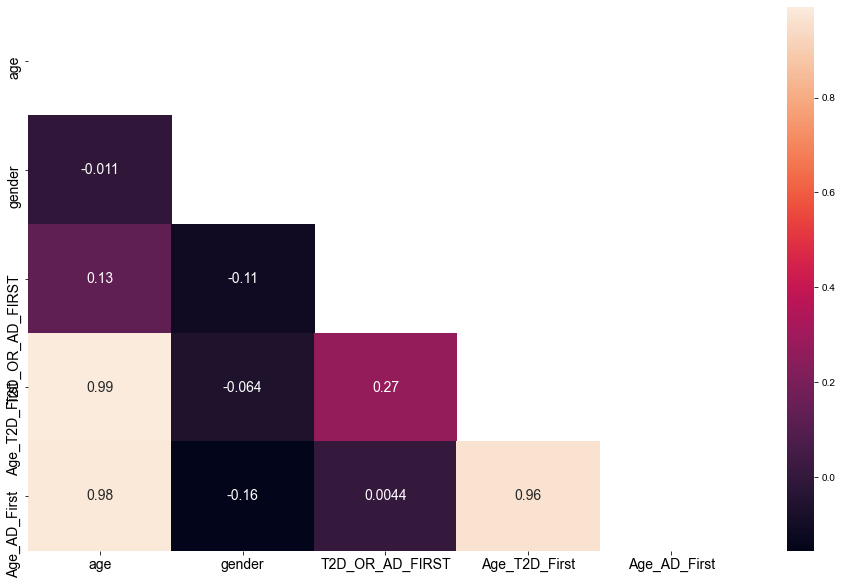

In [23]:
plt.figure(figsize=(16,10))
sns.heatmap(mimic_data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [24]:
mimic_data.tail(100)

,age,gender,birth_date,F_T2D_Diag,F_ALZ_Diag,T2D_OR_AD_FIRST,Age_T2D_First,Age_AD_First
50270,0,0,2135-09-13 23:00:00,,,NaN,NaN,NaN
50271,53,0,2114-02-04 00:00:00,,,NaN,NaN,NaN
50272,44,0,2154-04-09 23:00:00,,,NaN,NaN,NaN
50273,40,0,2154-04-09 23:00:00,,,NaN,NaN,NaN
50274,51,1,2135-04-21 23:00:00,,,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
50365,75,0,2122-05-22 23:00:00,,,NaN,NaN,NaN
50366,35,1,2144-06-11 23:00:00,,,NaN,NaN,NaN
50367,78,1,2045-08-18 23:00:00,,,NaN,NaN,NaN
50368,57,0,2103-01-19 00:00:00,,,NaN,NaN,NaN


## Visualising Data - Histograms, Distributions and Bar Charts

C:\Users\Administrator\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Administrator\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


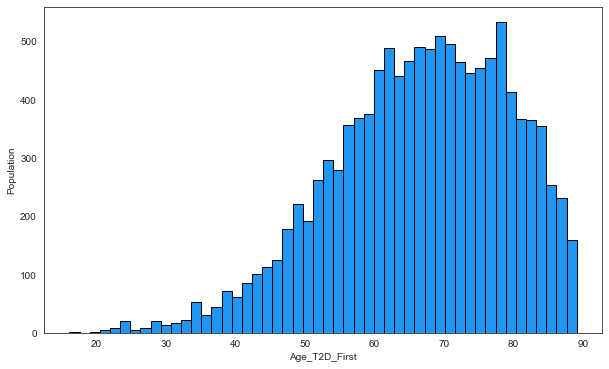

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(mimic_data['Age_T2D_First'], bins=50, ec='black', color='#2196f3')
plt.xlabel('Age_T2D_First')
plt.ylabel('Population')
plt.show()

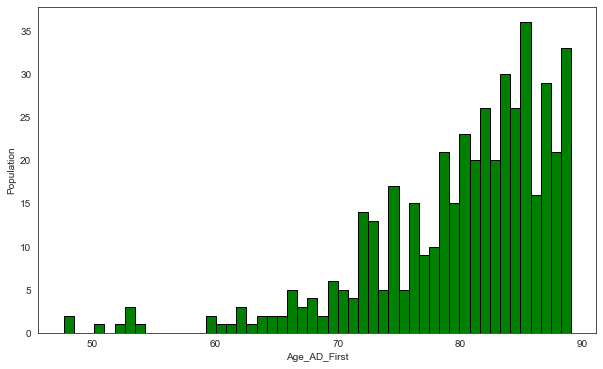

In [26]:
plt.figure(figsize=(10, 6))
plt.hist(mimic_data['Age_AD_First'], bins=50, ec='black', color='green')
plt.xlabel('Age_AD_First')
plt.ylabel('Population')
plt.show()

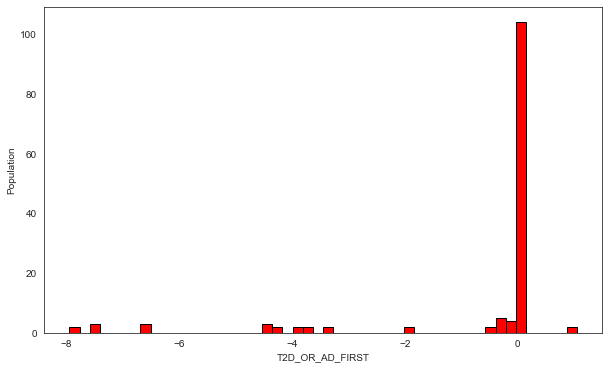

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(mimic_data['T2D_OR_AD_FIRST'], bins=50, ec='black', color='red')
plt.xlabel('T2D_OR_AD_FIRST')
plt.ylabel('Population')
plt.show()

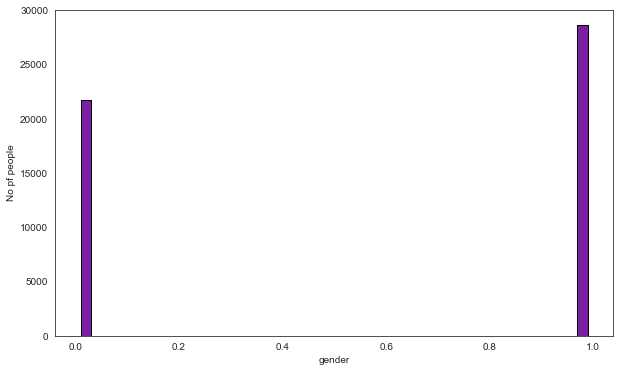

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(mimic_data['gender'], bins=24, ec='black', color='#7b1fa2', rwidth=0.5)
plt.xlabel('gender')
plt.ylabel('No pf people')
plt.show()

In [29]:
mimic_data.columns

Index(['age', 'gender', 'birth_date', 'F_T2D_Diag', 'F_ALZ_Diag',
       'T2D_OR_AD_FIRST', 'Age_T2D_First', 'Age_AD_First'],
      dtype='object')

In [30]:
mimic_data['Age_T2D_First'].describe()

count    11675.000000
mean        66.596241
std         12.688767
min         16.073000
25%         58.253000
50%         67.654000
75%         76.645000
max         89.063000
Name: Age_T2D_First, dtype: float64

In [31]:
mimic_data['Age_AD_First'].describe()

count    455.000000
mean      80.042187
std        7.428493
min       47.651000
25%       76.226000
50%       81.930000
75%       85.243000
max       89.052000
Name: Age_AD_First, dtype: float64

In [32]:
mimic_data['T2D_OR_AD_FIRST'].describe()

count    138.000000
mean      -0.773536
std        1.971288
min       -7.951000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.046000
Name: T2D_OR_AD_FIRST, dtype: float64

In [33]:
mimic_data['gender'].value_counts()

1    28637
0    21733
Name: gender, dtype: int64

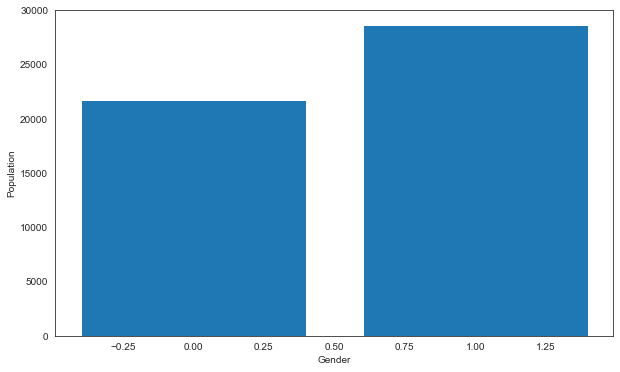

In [34]:
frequency = mimic_data['gender'].value_counts()
#type(frequency)
#frequency.index
#frequency.axes[0]
plt.figure(figsize=(10, 6))
plt.xlabel('Gender')
plt.ylabel('Population')
plt.bar(frequency.index, height=frequency)
plt.show()

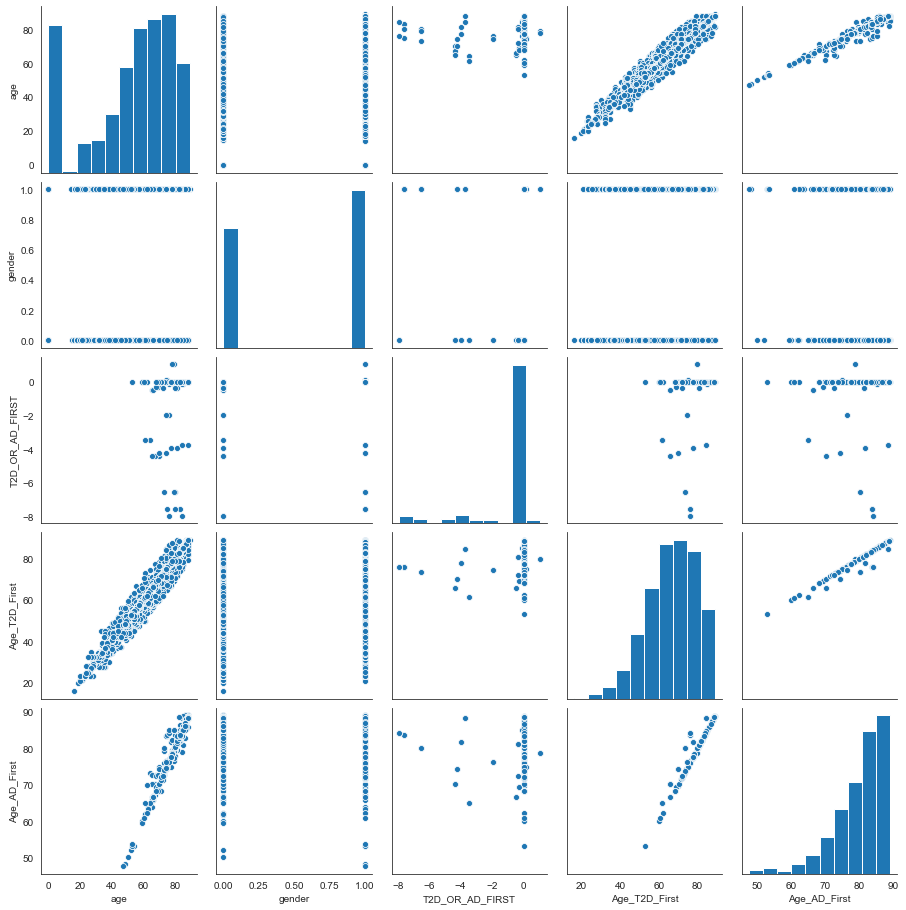

Wall time: 30.6 s


In [35]:
%%time

sns.pairplot(mimic_data)
plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


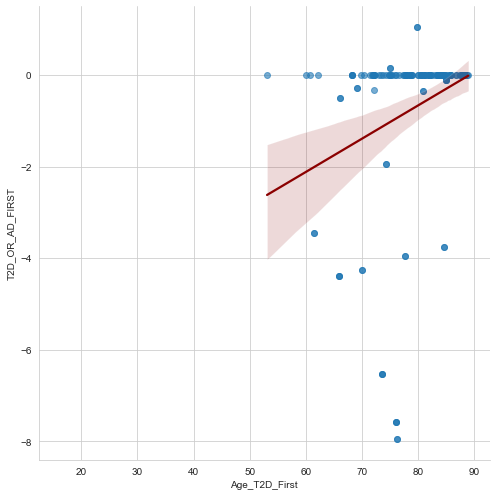

In [36]:
sns.set_style('whitegrid')
sns.lmplot(x='Age_T2D_First', y='T2D_OR_AD_FIRST', data=mimic_data, size=7, scatter_kws={'alpha': 0.6}, line_kws={'color':'darkred'})
plt.show()

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


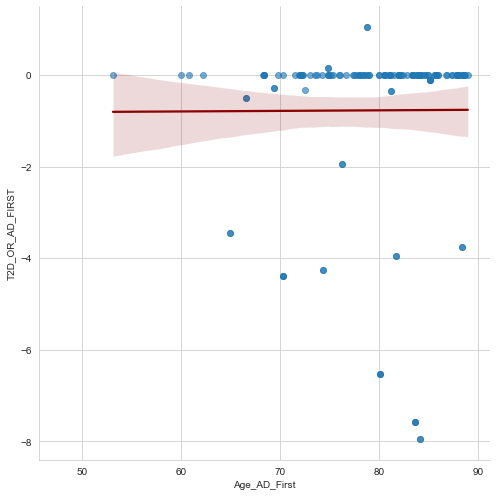

In [37]:
sns.set_style('whitegrid')
sns.lmplot(x='Age_AD_First', y='T2D_OR_AD_FIRST', data=mimic_data, size=7, scatter_kws={'alpha': 0.6}, line_kws={'color':'darkred'})
plt.show()